<a href="https://colab.research.google.com/github/mertcanik/Spotify-EDA/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import os
import re
from os import path
from PIL import Image
import datetime

In [ ]:
# Data Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
tracks = pd.read_csv('tracks.csv')
tracks.tail(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [ ]:
tracks.shape

(29169, 20)

In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


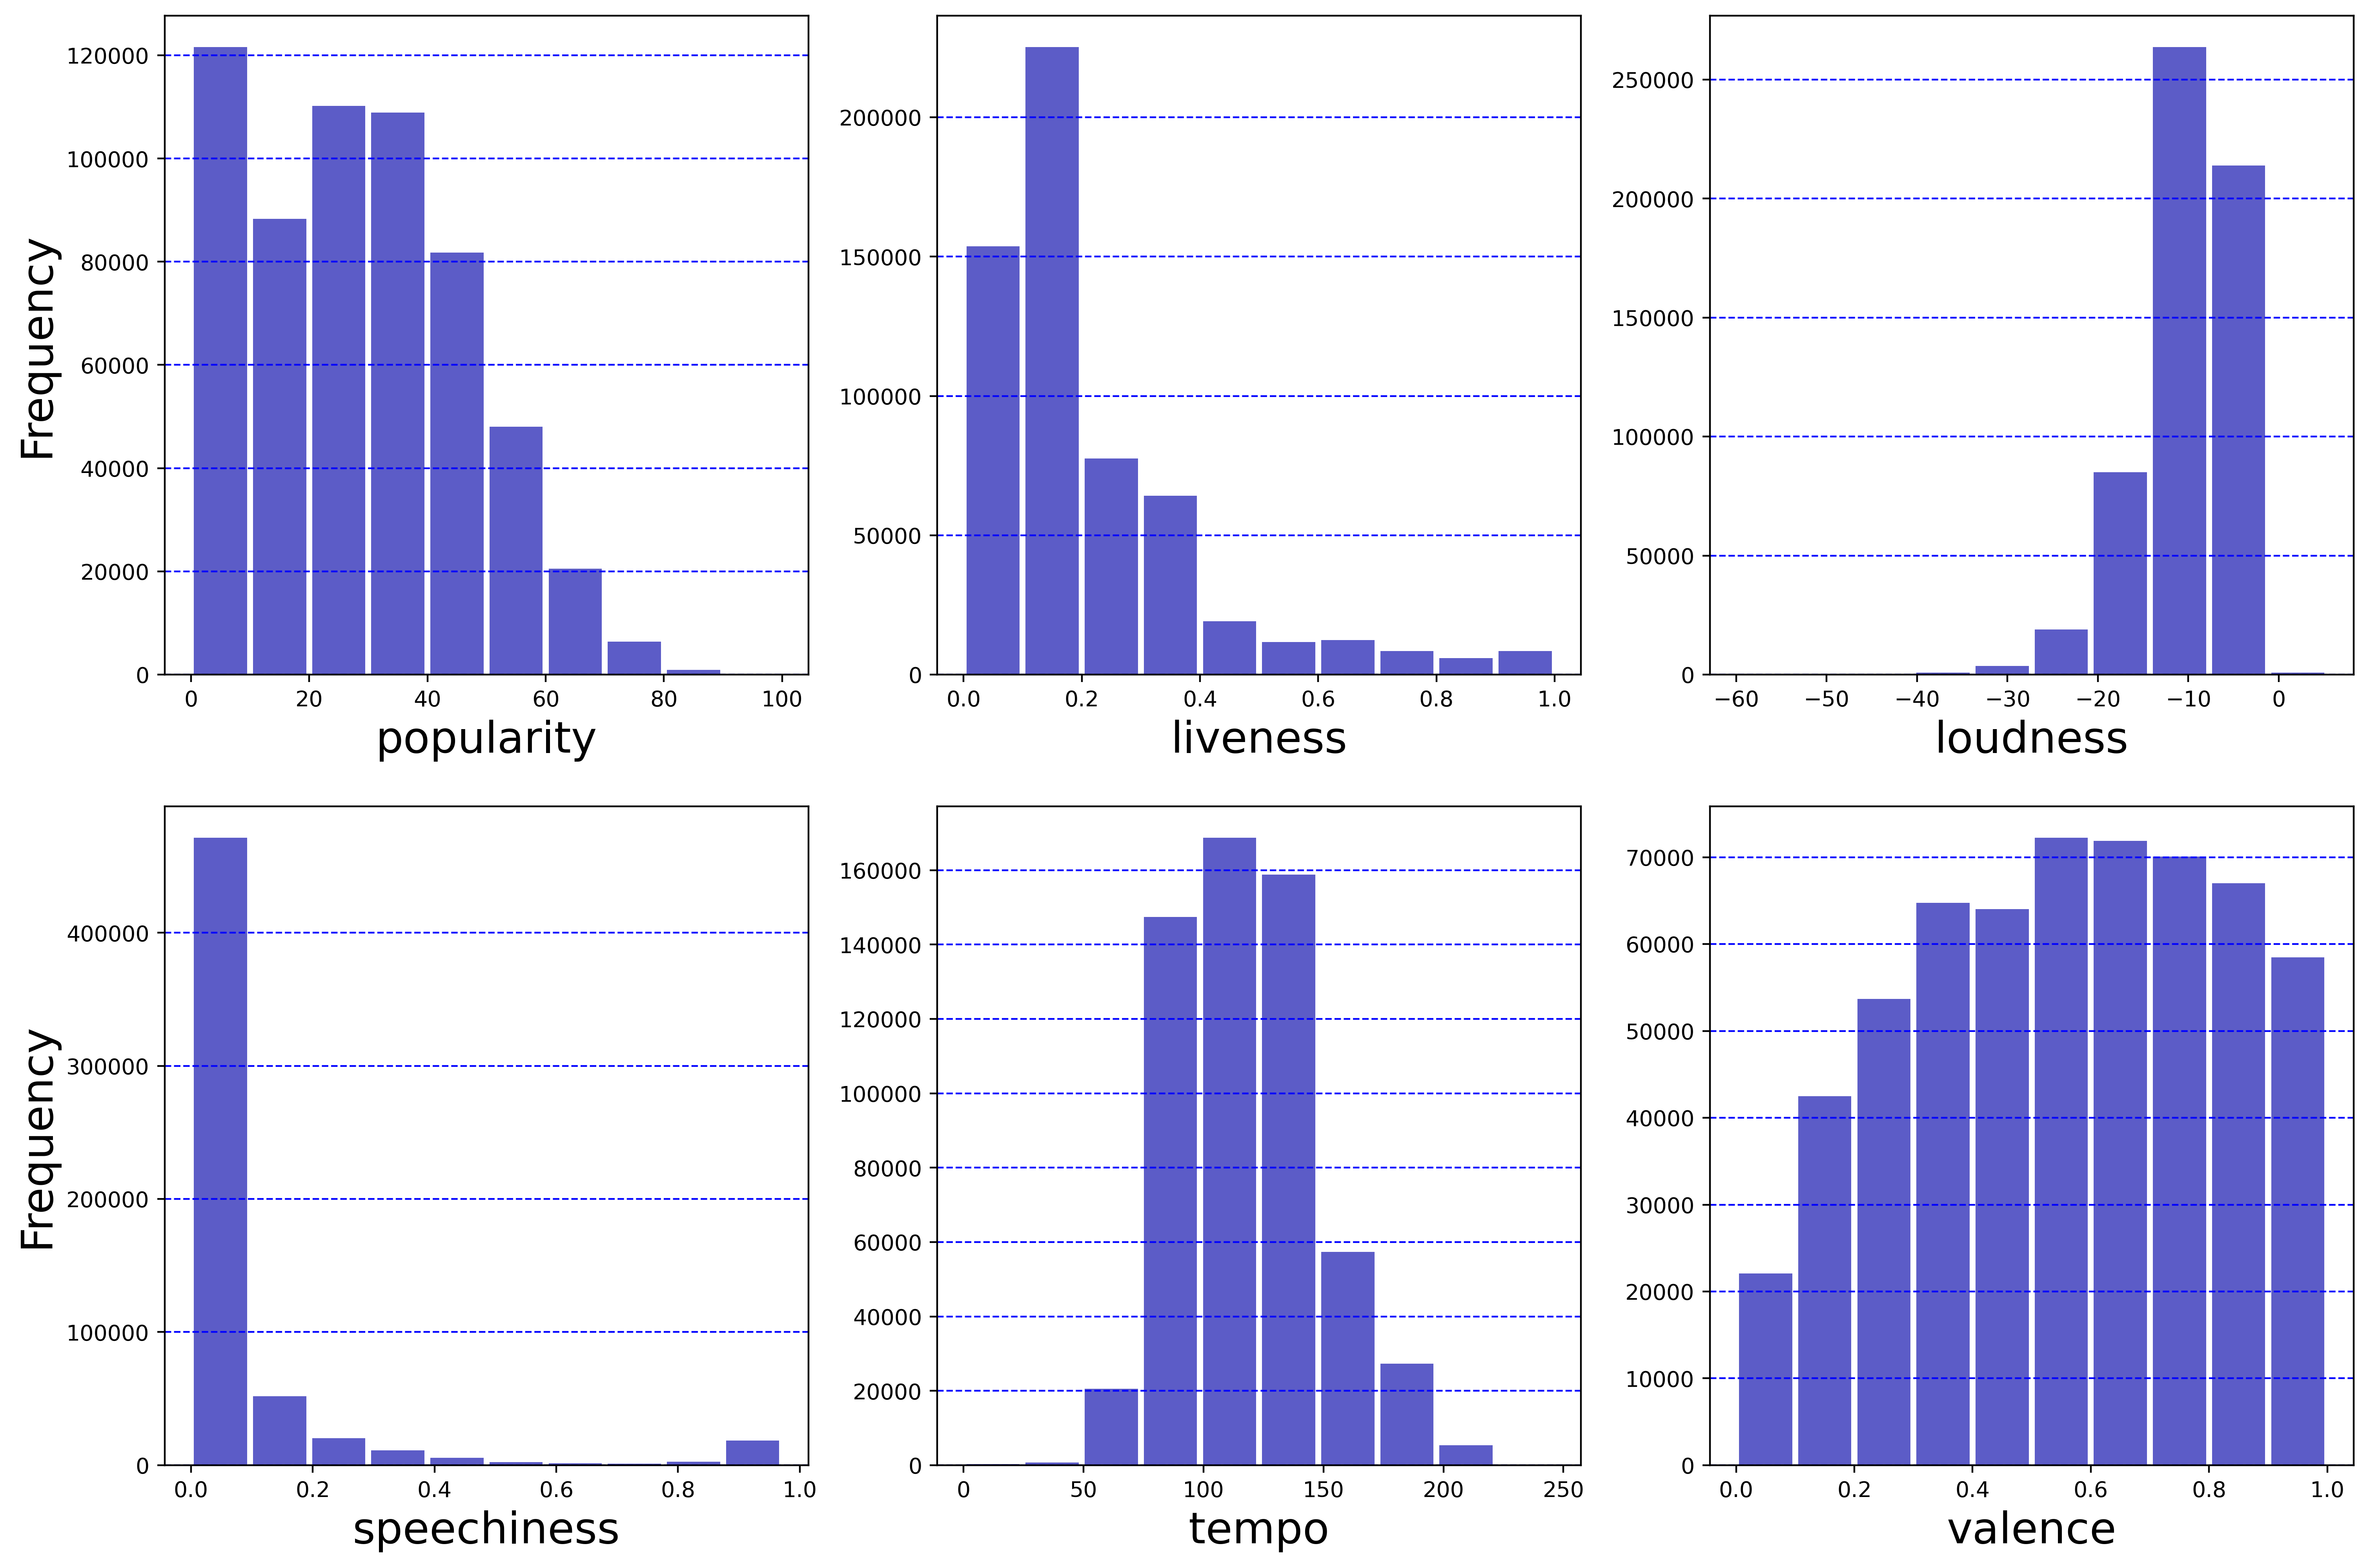

In [ ]:
features =  ['popularity', 'liveness', 'loudness','speechiness','tempo', 'valence']
l = len(features)
plt.figure(figsize=(18,12),dpi = 400)
for i in range (l):
    plt.subplot(2,3,i+1)
    plt.hist(tracks[features[i]],color='#0504aa',alpha = 0.65,rwidth=0.9)
    plt.xlabel(features[i],size = 20)
    if i == 0 or i == 3:
        plt.ylabel("Frequency",size = 20)

    plt.xticks()
    plt.yticks()
    plt.grid(axis = "y" , linestyle = "--",color = "b")

In [ ]:
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [ ]:
tracks.dropna(inplace = True)

In [ ]:
tracks.duplicated().sum()

0

In [ ]:
categorical_df = tracks.select_dtypes(include = 'object')

categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            586601 non-null  object
 1   name          586601 non-null  object
 2   artists       586601 non-null  object
 3   id_artists    586601 non-null  object
 4   release_date  586601 non-null  object
dtypes: object(5)
memory usage: 26.9+ MB


In [ ]:
for col in categorical_df.columns:
    print(f'{col}: {categorical_df[col].nunique()}')
    print('\n')

id: 586601


name: 446474


artists: 114029


id_artists: 115062


release_date: 19698




In [ ]:
# Remove the brackets and quotes from the 'artists' column
tracks['artists'] = tracks['artists'].str.replace(r"[\[\]']",'', regex=True)
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (16, 12))

def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=120, min_font_size=40, colormap='viridis', background_color='white', prefer_horizontal=.95, width=2100, height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')

<Figure size 1600x1200 with 0 Axes>

In [ ]:
lead_artist = tracks['artists'].value_counts().head(10)
lead_artist

Die drei ???                          3856
TKKG Retro-Archiv                     2006
Benjamin Blümchen                     1503
Bibi Blocksberg                       1472
Lata Mangeshkar                       1373
Bibi und Tina                          927
Tintin, Tomas Bolme, Bert-Åke Varg     905
Francisco Canaro                       891
Ella Fitzgerald                        870
Tadeusz Dolega Mostowicz               838
Name: artists, dtype: int64

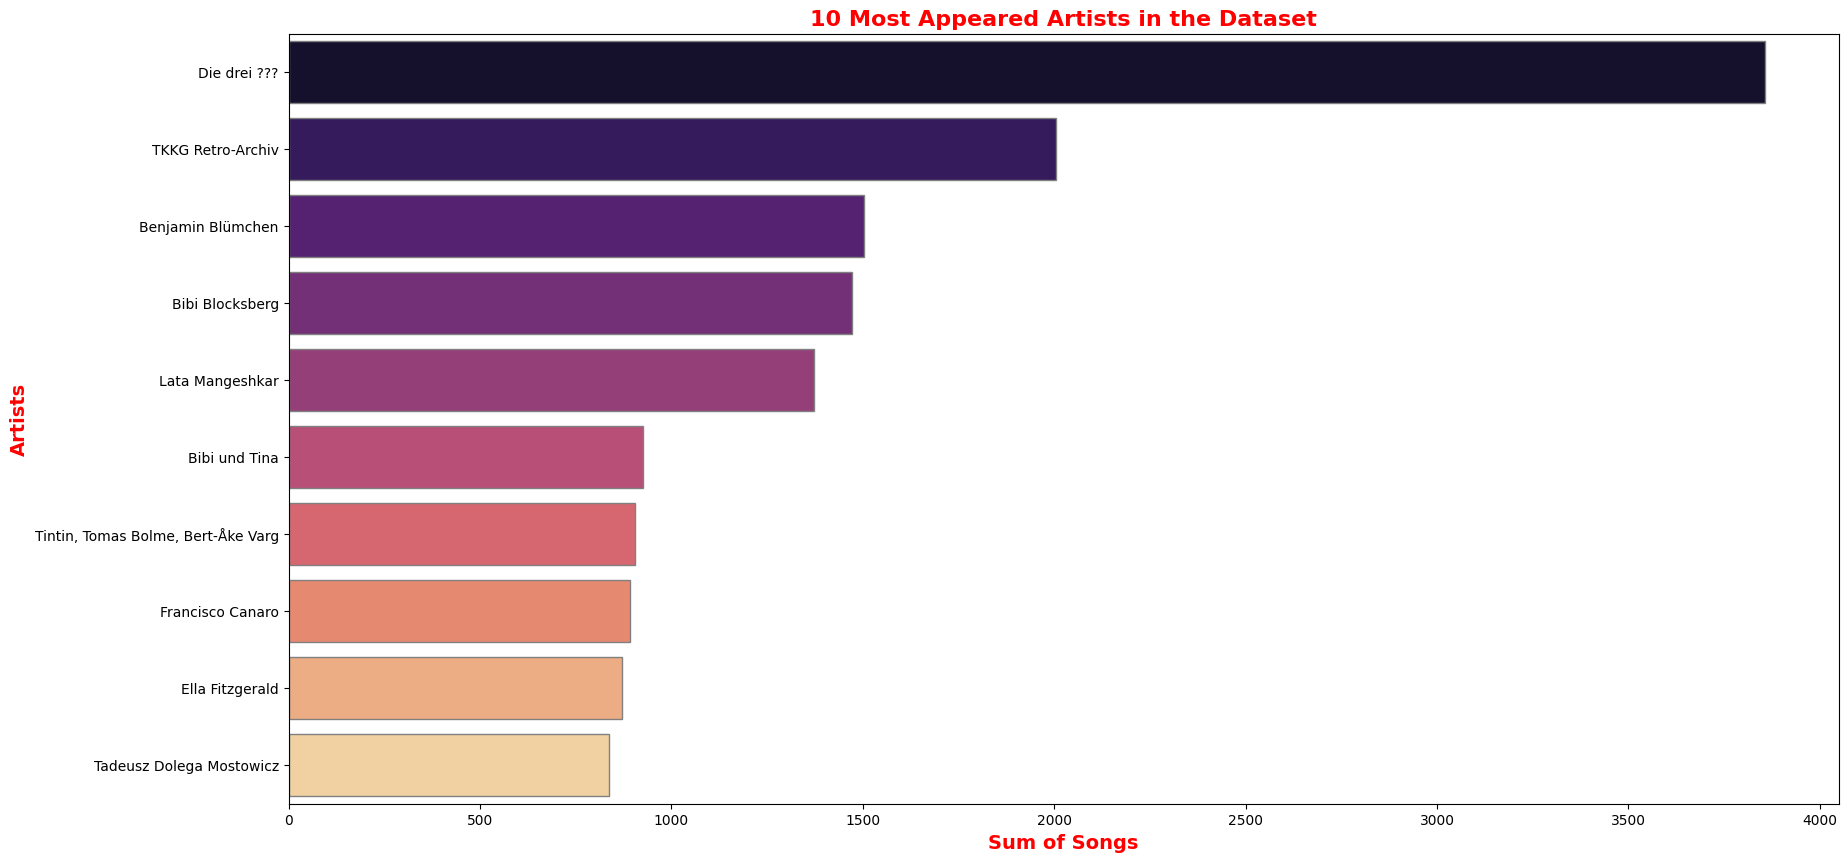

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))

ax = sns.barplot(x = lead_artist.values, y = lead_artist.index, palette = 'magma', orient = 'h', edgecolor = 'grey', ax = ax)

ax.set_xlabel('Sum of Songs', c ='r', fontsize = 14, weight = 'bold')
ax.set_ylabel('Artists', c = 'r', fontsize = 14, weight = 'bold')
ax.set_title('10 Most Appeared Artists in the Dataset', c = 'r', fontsize = 16, weight = 'bold')

plt.show()

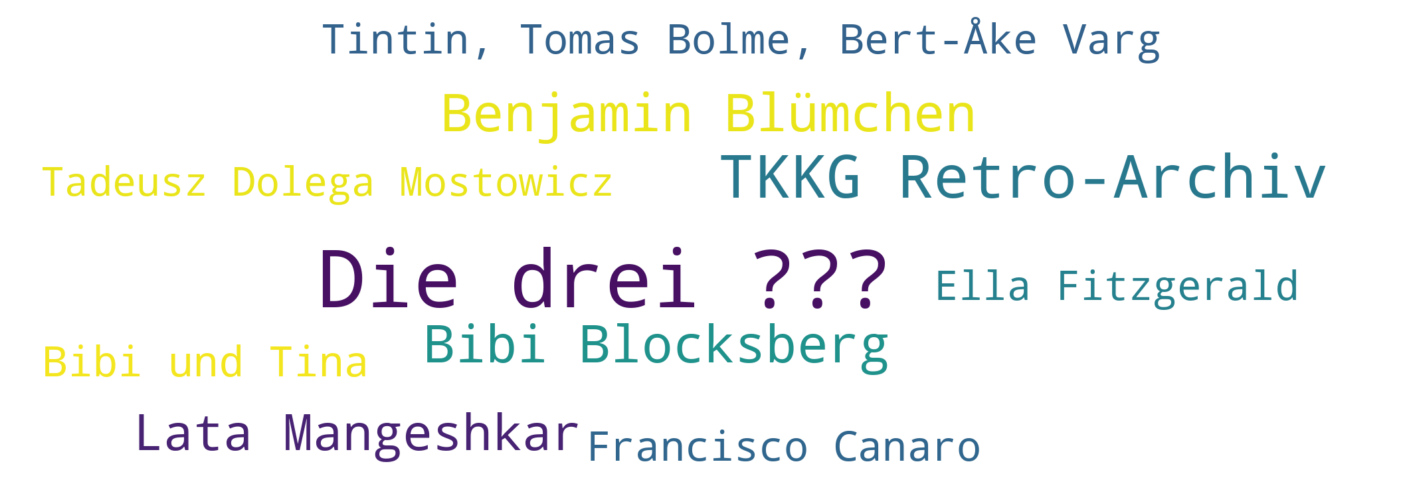

In [ ]:
visualize_word_counts(lead_artist)

In [ ]:
tracks.release_date = pd.to_datetime(tracks.release_date)
tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5


In [ ]:
tracks.release_date.min()

Timestamp('1900-01-01 00:00:00')

In [ ]:
tracks.release_date.max()

Timestamp('2021-04-16 00:00:00')

In [ ]:
tracks["year"] = tracks["release_date"].dt.year

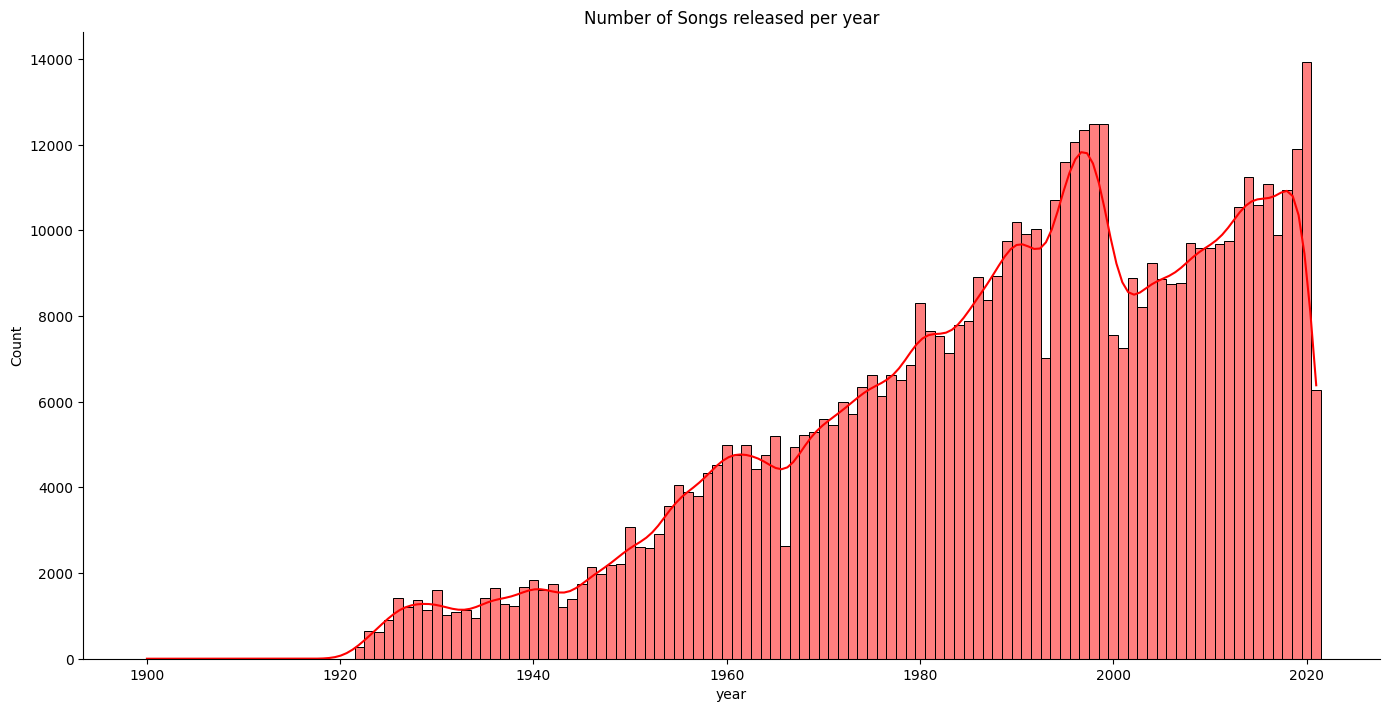

In [ ]:
sns.displot(tracks['year'], discrete=True, aspect=2, height=7, kind='hist', kde=True,color='red').set(title='Number of Songs released per year')

In [ ]:
most_popular = tracks.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)

most_popular.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"Justin Bieber, Daniel Caesar, Giveon","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,Olivia Rodrigo,['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,Masked Wolf,['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,The Weeknd,['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,Kali Uchis,['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,2020


In [ ]:
lead_songs = most_popular[['name','artists','popularity']].head(10)

lead_songs.head()

,name,artists,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",100
93803,drivers license,Olivia Rodrigo,99
93804,Astronaut In The Ocean,Masked Wolf,98
92810,Save Your Tears,The Weeknd,97
92811,telepatía,Kali Uchis,97


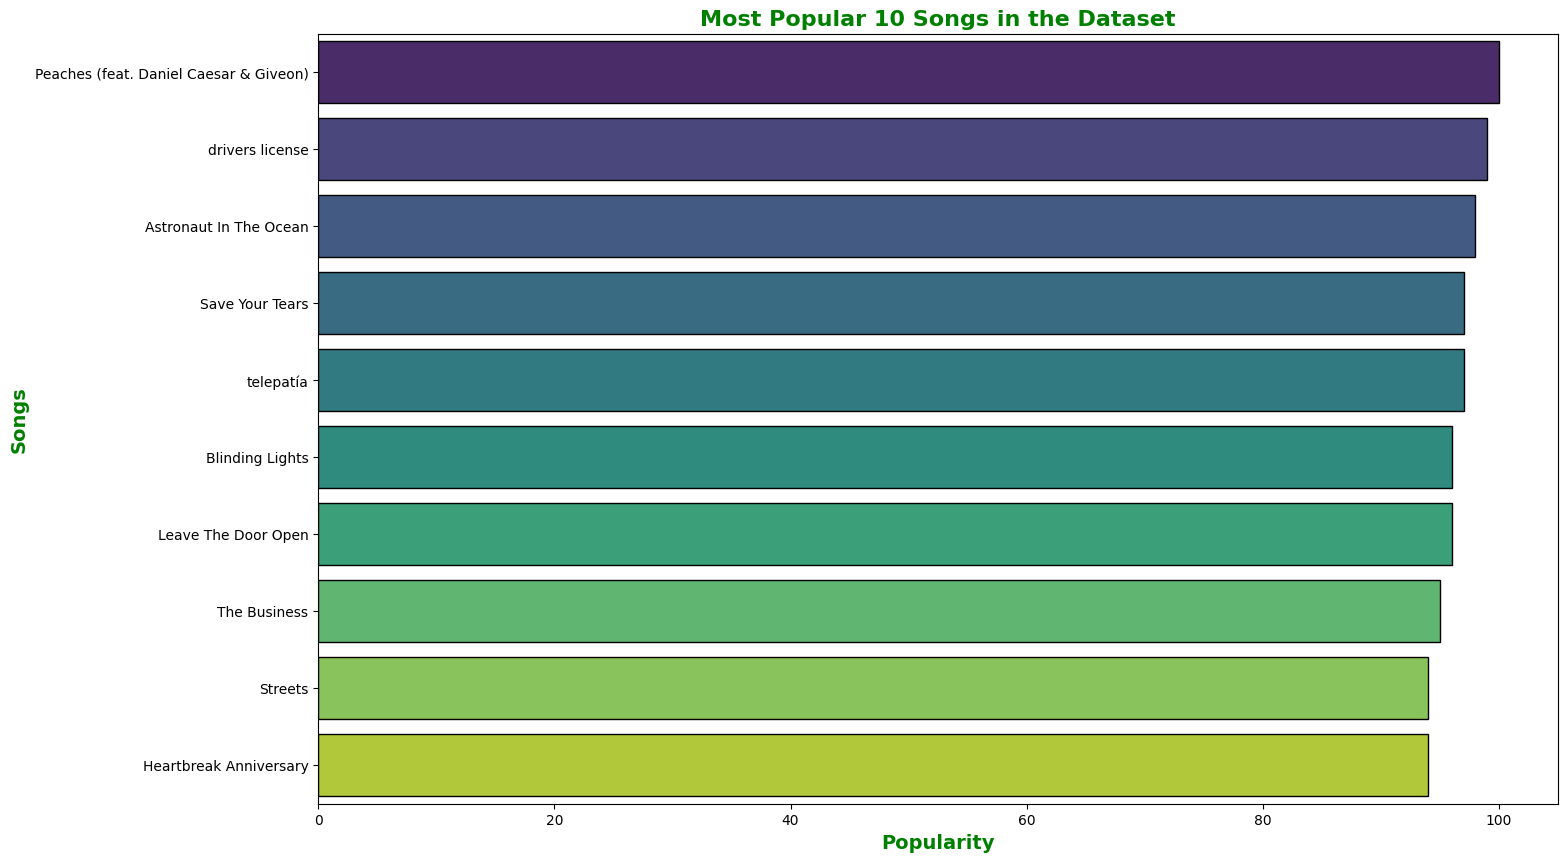

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax = sns.barplot(x = lead_songs.popularity, y = lead_songs.name, palette = 'viridis', orient = 'h', edgecolor = 'black', ax = ax)

ax.set_xlabel('Popularity', c ='green', fontsize = 14, weight = 'bold')
ax.set_ylabel('Songs', c = 'green', fontsize = 14, weight = 'bold')
ax.set_title('Most Popular 10 Songs in the Dataset', c = 'green', fontsize = 16, weight = 'bold')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

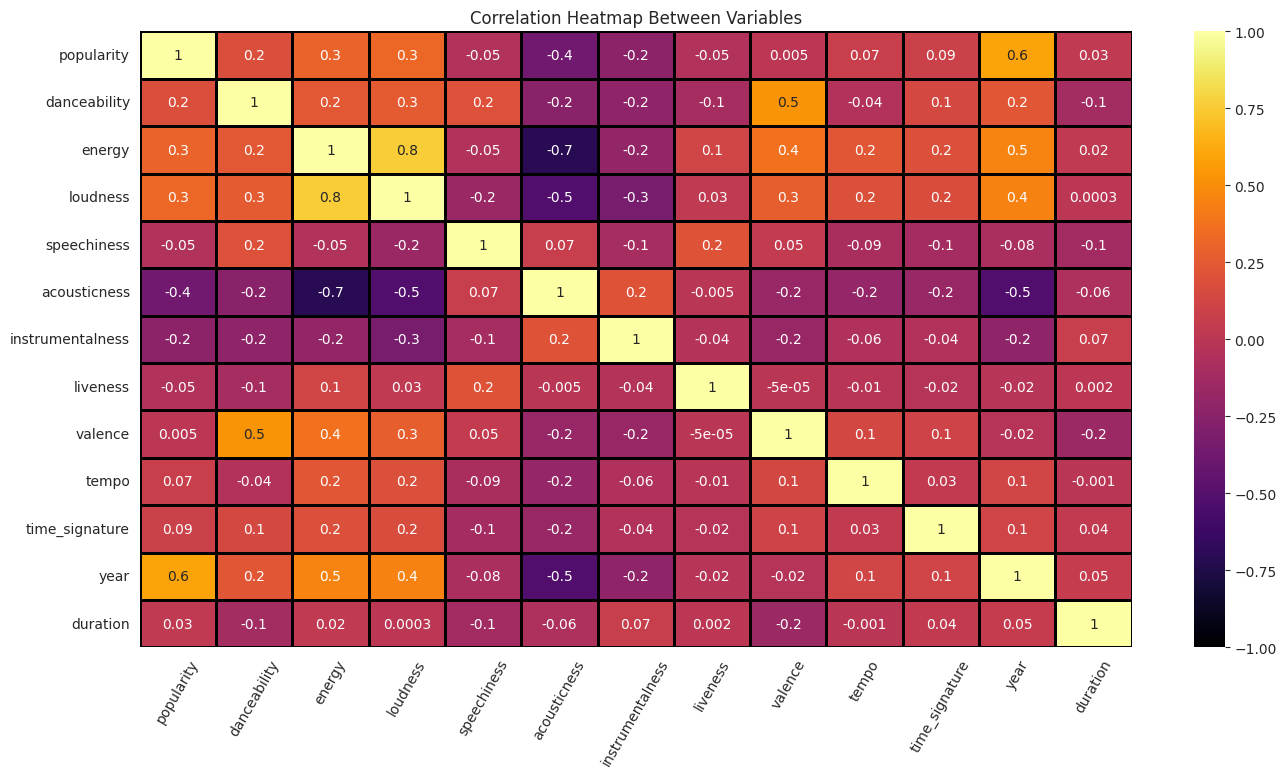

In [ ]:
corr_df = tracks.drop(["key","mode","explicit"], axis=1).corr(method="pearson",numeric_only=True)
plt.figure(figsize=(16,8))
# annot writes each value of dataset in cell
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=60)
plt.show

In [ ]:
#Getting sample from the dataset
sample_tracks = tracks.sample(int(0.006*len(tracks)))
print(len(sample_tracks))

3519


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

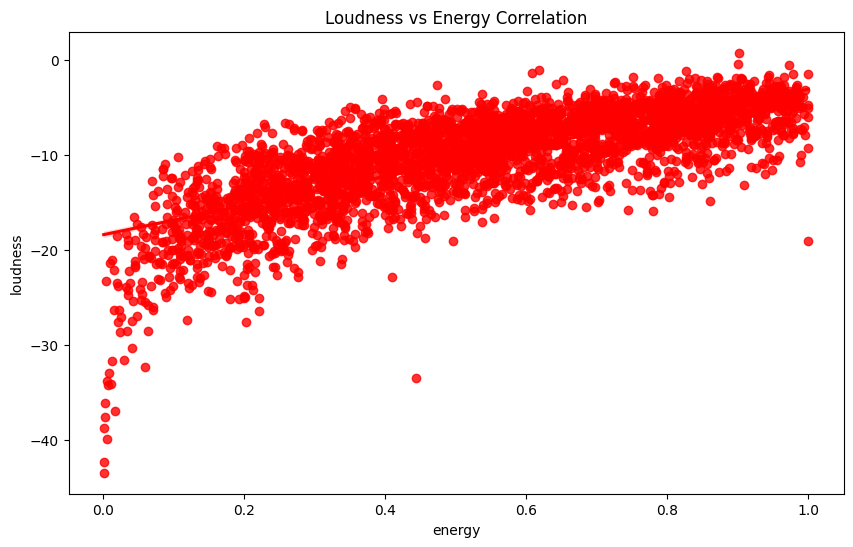

In [ ]:
plt.figure(figsize=(10,6))
# regeration plot regplot
sns.regplot(data = sample_tracks, y = "loudness", x = "energy", color = "r").set(title = "Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

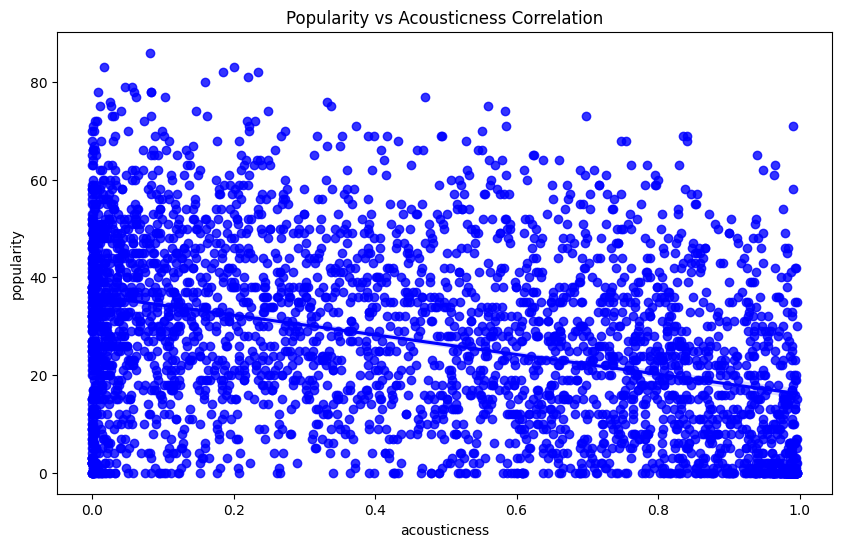

In [ ]:
plt.figure(figsize=(10,6))
# regeration plot regplot
sns.regplot(data = sample_tracks, y = "popularity", x = "acousticness", color = "b").set(title = "Popularity vs Acousticness Correlation")

In [ ]:
# Convert duration in ms to sec
tracks['duration'] = tracks['duration_ms'].apply(lambda x:round(x/1000))
#Drop the duration_ms column
tracks.drop('duration_ms', inplace=True, axis=1)
tracks.duration.head()

0    127
1     98
2    182
3    177
4    163
Name: duration, dtype: int64

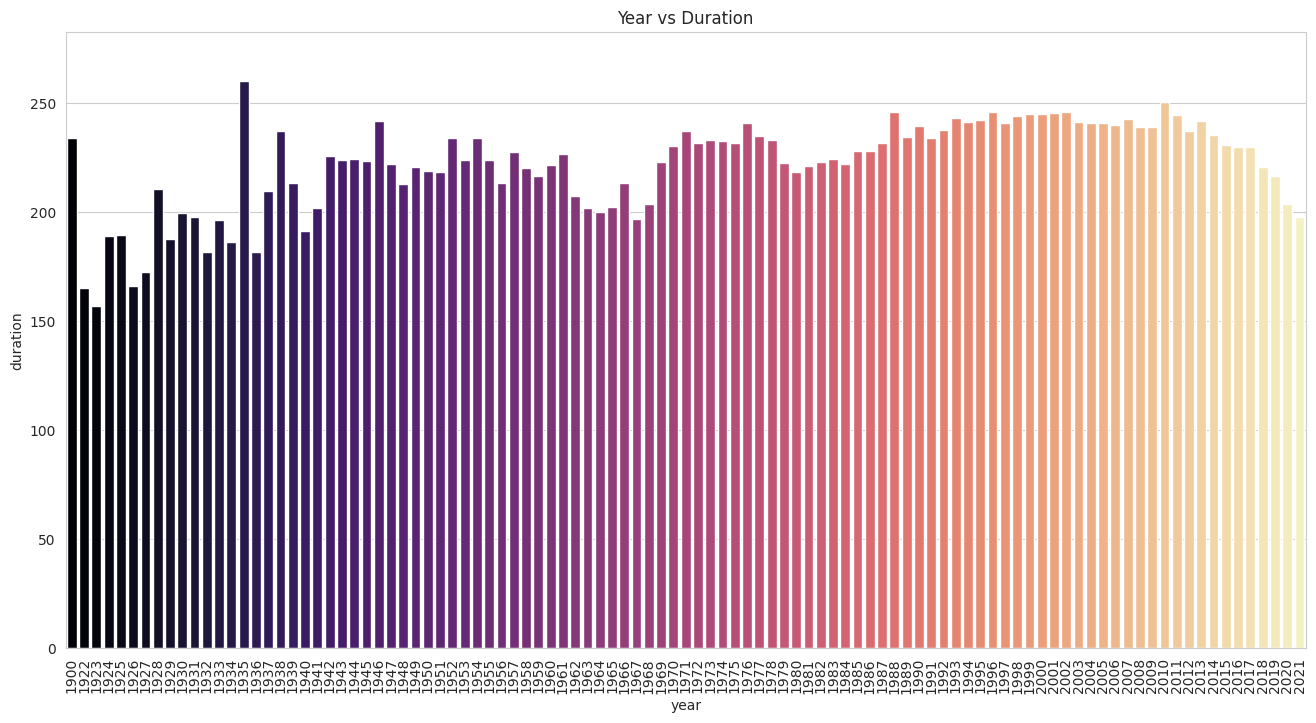

In [ ]:
total_duration = tracks.duration
fig, ax = plt.subplots(figsize = (16,8))
fig = sns.barplot(x = tracks.year, y = total_duration,palette = 'magma', ax=ax, errwidth = False).set(title="Year vs Duration")
plt.xticks(rotation=90)
plt.show()

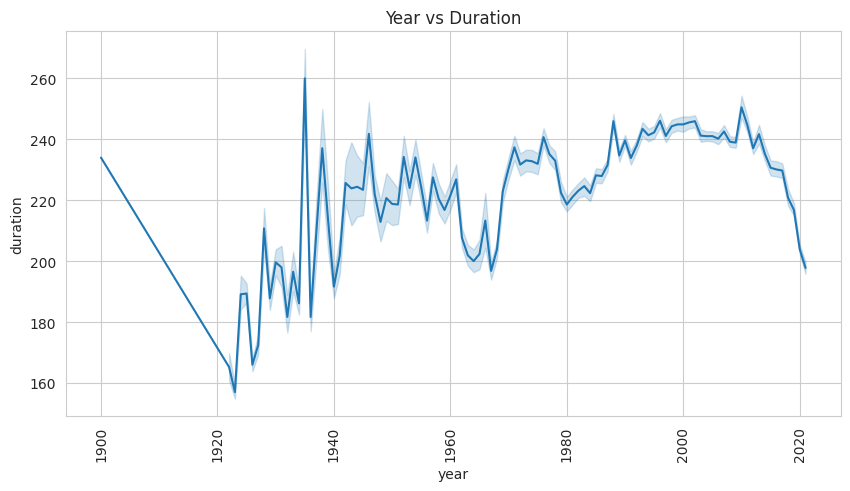

In [ ]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
fig = sns.lineplot(x=tracks.year, y=total_duration, ax=ax).set(title="Year vs Duration")
plt.xticks(rotation=90)
plt.show()